## Problem Statement 



This dataset contains information collected by the U.S Census Service concerning housing 
in   the  area  of  Boston   Mass.  It  is  in  Python  sklearn library   itself,  and  has   been  used 
extensively throughout the literature to benchmark algorithms. The dataset is small in size 
with only 506 cases. 

Dataset Naming 

The    name   for  this  dataset  is  simply Boston.    It  has  two  prototasks: nox,    in  which  the 
nitrous oxide level is to be predicted; and price, in which the median value of a home is to 
be predicted 

In [3]:
# Importing the packages and modules
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# loading the data 
boston=load_boston()

In [5]:
# Storing the data into dataframe
df=pd.DataFrame(boston.data, columns=boston.feature_names)

In [6]:
# Checking the first rows details
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# Checking the Statistical values using the describe function
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
# Checking the column details uisng the info command
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
# Checking the NULL values
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [10]:
# From Above, we can conclude there are no null values

In [11]:
# Adding the target variable to dataset
df['Medv']=boston.target

Exploratory Data Analysis

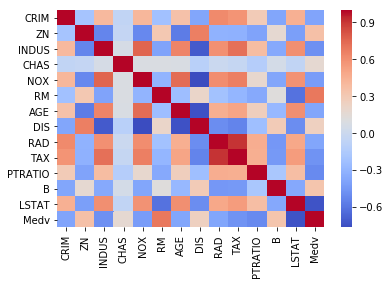

In [18]:
# Correlation  among the features
sn.heatmap(df.corr(), cmap='coolwarm')

In [19]:
# By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74)

In [55]:
# Plotting the ditplot for target variable

C:\Users\Satish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


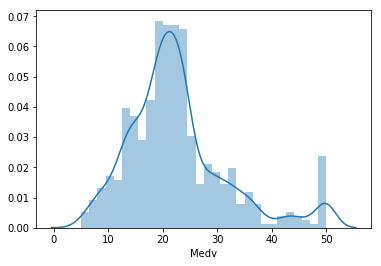

In [14]:
sn.distplot(df['Medv'], bins=30)
plt.show()

In [15]:
# the values of MEDV are distributed normally with few outliers

In [24]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Medv'],
      dtype='object')

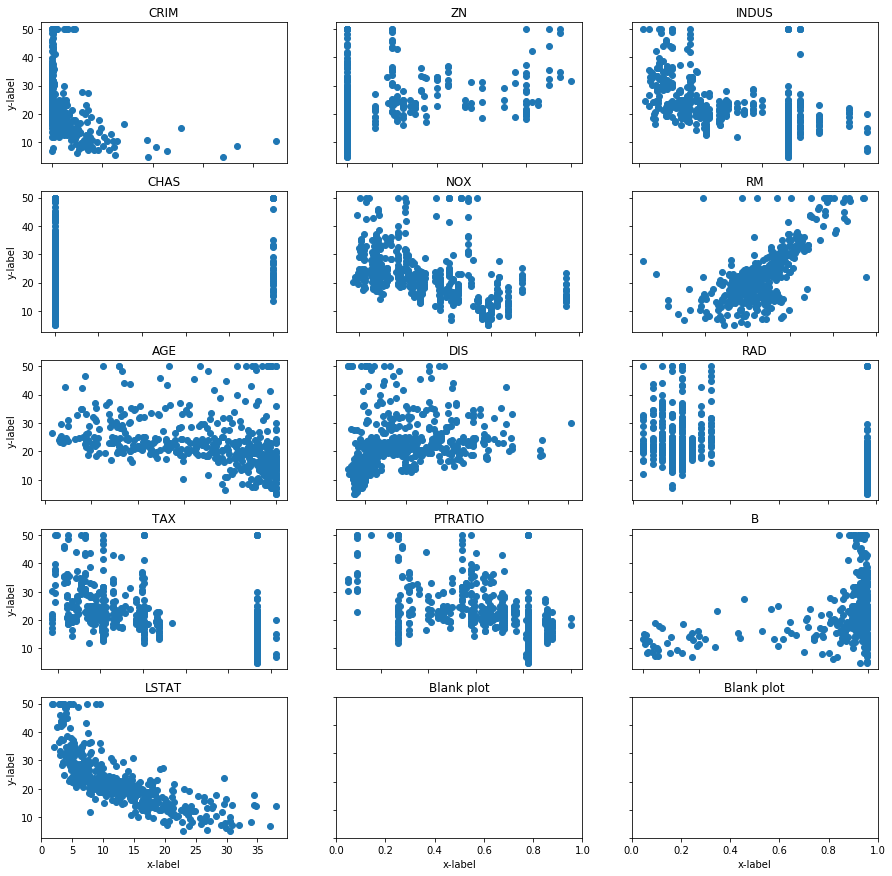

In [22]:
# Scatter plot for all independent variables vs dependent variable

target=df["Medv"]
fig, axes = plt.subplots(5, 3,figsize=(15,15))
axes[0, 0].set_title('CRIM')
axes[0, 0].scatter(df["CRIM"], target)
axes[0, 1].set_title('ZN')
axes[0, 1].scatter(df["ZN"], target)
axes[0, 2].set_title('INDUS')
axes[0, 2].scatter(df["INDUS"], target)
axes[1, 0].set_title('CHAS')
axes[1, 0].scatter(df["CHAS"], target)
axes[1, 1].set_title('NOX')
axes[1, 1].scatter(df["NOX"], target)
axes[1, 2].set_title('RM')
axes[1, 2].scatter(df["RM"], target)
axes[2, 0].set_title('AGE')
axes[2, 0].scatter(df["AGE"], target)
axes[2, 1].set_title('DIS')
axes[2, 1].scatter(df["DIS"], target)
axes[2, 2].set_title('RAD')
axes[2, 2].scatter(df["RAD"], target)
axes[3, 0].set_title('TAX')
axes[3, 0].scatter(df["TAX"], target)
axes[3, 1].set_title('PTRATIO')
axes[3, 1].scatter(df["PTRATIO"], target)
axes[3, 2].set_title('B')
axes[3, 2].scatter(df["B"], target)
axes[4, 0].set_title('LSTAT')
axes[4, 0].scatter(df["LSTAT"], target)
axes[4, 1].set_title('Blank plot')
axes[4, 2].set_title('Blank plot')

for ax in axes.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()

In [23]:
# dropping the target variable and creating the X and y parameters. Splitting the data into train and test dataset.
X=df.drop('Medv',axis=1)
y=df['Medv']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

## L2 Regularization Technique

In [25]:
# Creating the linear regression object and training the model with train dataset
lr = LinearRegression()
lr.fit(X_train, y_train)

# Creating the Ridge object and training the model with train dataset with alpha value 0.01
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

# Creating the Ridge object and training the model with train dataset with alpha value 100
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

# Calculating the score of linear regression model
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

# Calculating the score of Ridge when Alpha=0.01
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

# Calculating the score of Ridge when Alpha=100
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [28]:
# Printing all the values of linear regression, Ridge(alpha0.01 and 100)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.6832133784853487
linear regression test score: 0.6365801839267264
ridge regression train score low alpha: 0.7419030253527293
ridge regression test score low alpha: 0.7145115044376251
ridge regression train score high alpha: 0.7172809669938278
ridge regression test score high alpha: 0.6805838894730996


## L1 Regularization

In [27]:
# Creating Object for Lasso and training the model with train dataset
lasso = Lasso()
lasso.fit(X_train,y_train)

# Calculating the score of train and test dataset
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)

# Coeeficient values
coeff_used = np.sum(lasso.coef_!=0)

# Printing all values
print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)

# Creating Object for Lasso and training the model with train dataset  with Alpha value 0.01
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

# Calculating the score of train and test dataset
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)

# Coeeficient values
coeff_used001 = np.sum(lasso001.coef_!=0)

# Printing all values
print("training score for alpha=0.01:", train_score001)
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)

training score: 0.6832133784853487
test score:  0.6365801839267264
number of features used:  11
training score for alpha=0.01: 0.7414845253242521
test score for alpha =0.01:  0.7094982876869665
number of features used: for alpha =0.01: 13


## Polynomial Model

In [29]:
# Creating the Polynomial feature object with degree 2
poly_features = PolynomialFeatures(degree=2)
  
## transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)
  
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
  
print("\n")
  
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 3.8208107201576778
R2 score of training set is 0.831940505421024


The model performance for the test set
-------------------------------------------
RMSE of test set is 5.403434406796887
R2 score of test set is 0.6287739206132372
